In [1]:
'''
Bank Marketing Campaign
Lachandra Ash
11/6/2022
'''

'\nBank Marketing Campaign\nLachandra Ash\n11/6/2022\n'

In [2]:
#Import the necessary modules and libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import plotly.express as px

In [3]:
#Import the bank.csv file into a pandas dataframe.
bankdf=pd.read_csv('bank_additional_full.csv')
#Display the first five records of the dataframe.
bankdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False


In [4]:
#Data Cleansing

In [5]:
#Check dataframe for missing values
bankdf.isna()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
#Check the dataframe for the sum of missing values.
bankdf.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [7]:
#Check the dataframe for duplicates.
bankdf.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [8]:
#Check the sum of duplications within the dataframe.
bankdf.duplicated().sum()

12

In [9]:
#Drop the duplicates within the dataframe.
df1=pd.DataFrame(bankdf)
display(df1.drop_duplicates())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True


In [10]:
#Exploratory Data Analysis

In [11]:
# Display the shape of the dataframe.
df1.shape

(41188, 21)

In [12]:
#View the description of the dataframe.
df1.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
#Display dataframe's information.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [14]:
#Display the correlation of the dataframe's features.
df1.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


In [15]:
#Display the covariance of the dataframe's features.
df1.cov()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,108.602451,-2.339147,0.132603,-66.945400,0.125661,-0.006069,0.005168,6.239801,0.194622,-13.346160,0.100162
duration,-2.339147,67225.728877,-51.494888,-2305.683015,2.648520,-11.391802,0.797272,-9.807412,-14.793831,-837.439866,33.223215
campaign,0.132603,-51.494888,7.672975,27.224921,-0.108494,0.656017,0.204971,-0.176061,0.649236,28.838822,-0.058116
pdays,-66.945400,-2305.683015,27.224921,34935.687284,-54.346448,79.574823,8.535132,-79.016677,96.250874,5031.877477,-19.201231
previous,0.125661,2.648520,-0.108494,-54.346448,0.244927,-0.326918,-0.058190,-0.116670,-0.390128,-17.926342,0.036017
emp_var_rate,-0.006069,-11.391802,0.656017,79.574823,-0.326918,2.467915,0.705038,1.425360,2.649121,102.944953,-0.148181
cons_price_idx,0.005168,0.797272,0.204971,8.535132,-0.058190,0.705038,0.335056,0.158023,0.690961,21.832546,-0.024929
cons_conf_idx,6.239801,-9.807412,-0.176061,-79.016677,-0.116670,1.425360,0.158023,21.420215,2.229089,33.611125,0.080304
euribor3m,0.194622,-14.793831,0.649236,96.250874,-0.390128,2.649121,0.690961,2.229089,3.008308,118.443421,-0.168778
nr_employed,-13.346160,-837.439866,28.838822,5031.877477,-17.926342,102.944953,21.832546,33.611125,118.443421,5220.283250,-8.102276


In [16]:
#Display the number of features within the dataset.
id_col, target_col = 'id', 'term_deposit_subscribed'
features = [c for c in df1.columns if c not in [id_col, target_col]]
print('There are',len(features),'number of features')

There are 21 number of features


In [17]:
#Display the colomns.
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [18]:
#Check the dataframe's dtypes.
df1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                    bool
dtype: object

In [19]:
#Display the unique values within the dataframe.
df1.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp_var_rate        10
cons_price_idx      26
cons_conf_idx       26
euribor3m          316
nr_employed         11
y                    2
dtype: int64

In [20]:
#Check and display the number of categories in every feature.
print("Personal loan:",df1.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",df1.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",df1.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",df1.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",df1.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",df1.y.value_counts(),sep = '\n')
print("-"*40)
print("Job:",df1.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",df1.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",df1.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",df1.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",df1.housing.value_counts(),sep = '\n')
print("-"*40)

Personal loan:
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
----------------------------------------
Contact:
cellular     26144
telephone    15044
Name: contact, dtype: int64
----------------------------------------
Month:
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
----------------------------------------
Day:
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64
----------------------------------------
Previous outcome:
nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
----------------------------------------
Outcome of this campaign:
False    36548
True      4640
Name: y, dtype: int64
----------------------------------------
Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           17

In [21]:
#Display the categorical columns
cat_cols = [df1.columns[i] 
            for i in range(1, df1.shape[1]-1)  
            if df1.iloc[:,i].dtype=='O']
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [22]:
num_cols = [c for c in features if c not in cat_cols]
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y']

In [23]:
#Data Analysis

Text(0, 0.5, '')

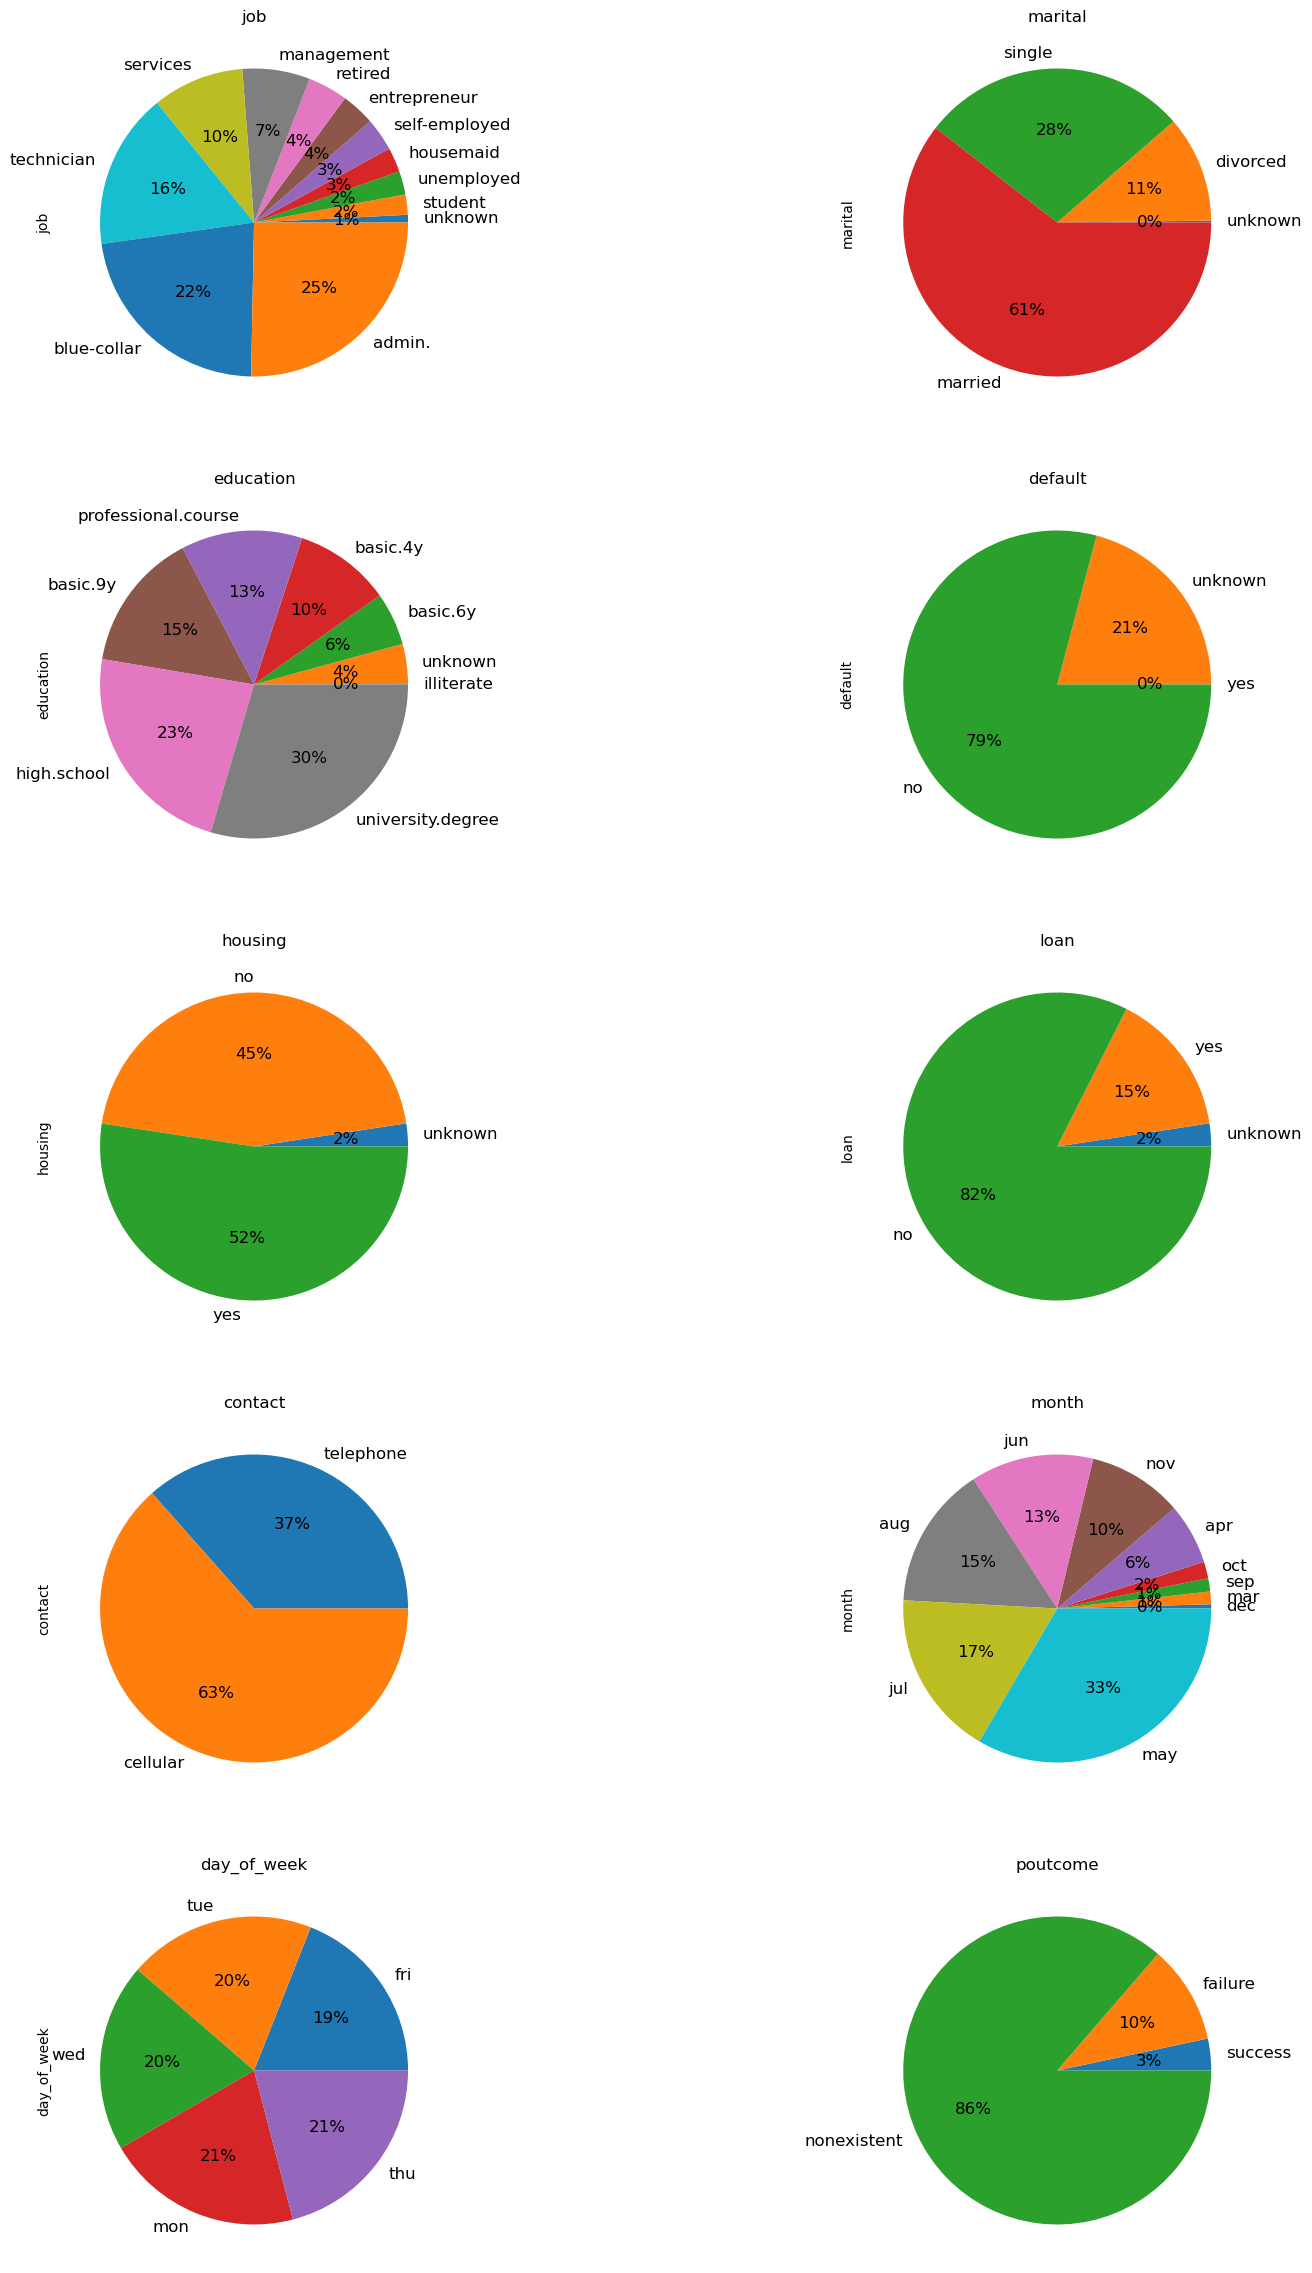

In [24]:
#Create pie charts to view the porportions of the feature samples.
fig, axes = plt.subplots(5, 2, figsize=(19,29))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(df1[cat_cols]):
   df1[c].value_counts()[::-1].plot(kind='pie',
                                          ax=axes[i],
                                          title=c,
                                          autopct='%.0f%%',
                                          fontsize=12)
axes[i].set_ylabel('')

Text(0, 0.5, 'Cammpaigns')

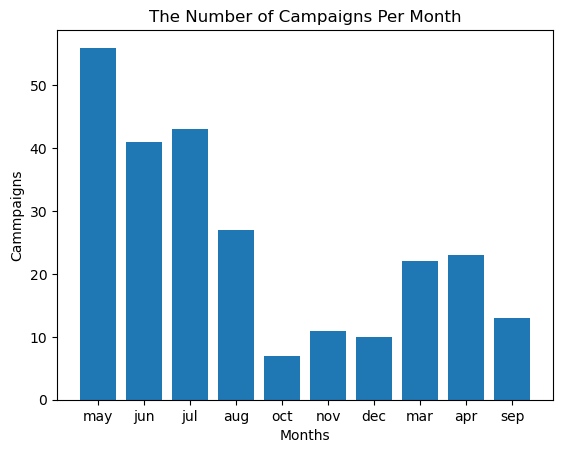

In [25]:
#Display the month and campaign plot.
plt.bar(df1['month'], df1['campaign'])
plt.title('The Number of Campaigns Per Month')
plt.xlabel('Months')
plt.ylabel('Cammpaigns')

Text(0, 0.5, 'Durations of Calls')

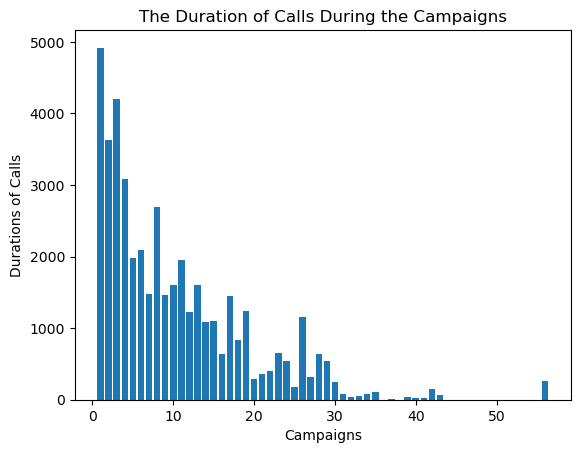

In [26]:
#Display the month and campaign plot.
plt.bar(df1['campaign'], df1['duration'])
plt.title('The Duration of Calls During the Campaigns')
plt.xlabel('Campaigns')
plt.ylabel('Durations of Calls')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

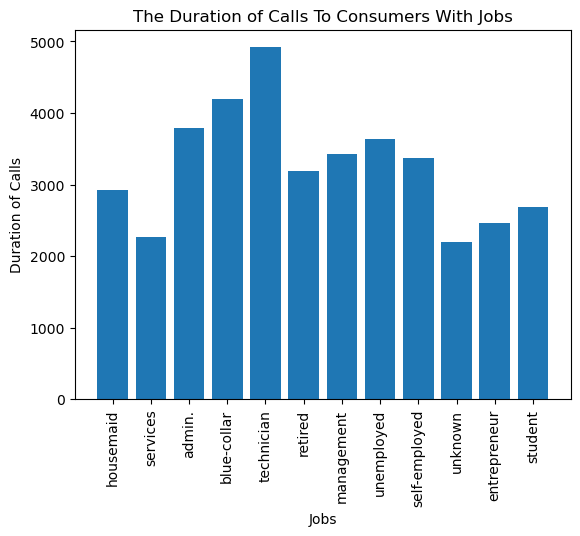

In [62]:
#Display the duration versus job barplot.
plt.bar(df1['job'], df1['duration'])
plt.title('The Duration of Calls To Consumers With Jobs')
plt.xlabel('Jobs')
plt.ylabel('Duration of Calls')
plt.xticks(rotation=90) 

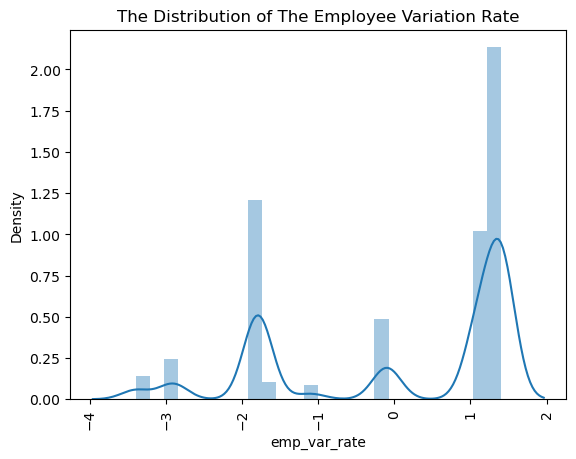

In [35]:
#Create distribution plot for employee variation rate
sns.distplot(df1['emp_var_rate'])
plt.title('The Distribution of The Employee Variation Rate')
plt.xticks(rotation=90)          
plt.show()

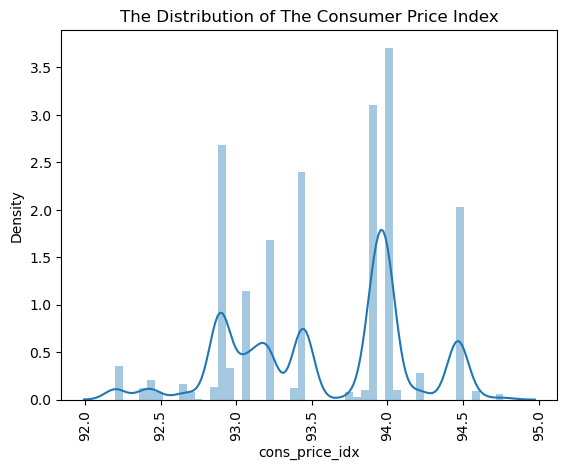

In [34]:
#Create distribution plot for employee variation rate
sns.distplot(df1['cons_price_idx'])
plt.title('The Distribution of The Consumer Price Index')
plt.xticks(rotation=90)          
plt.show()

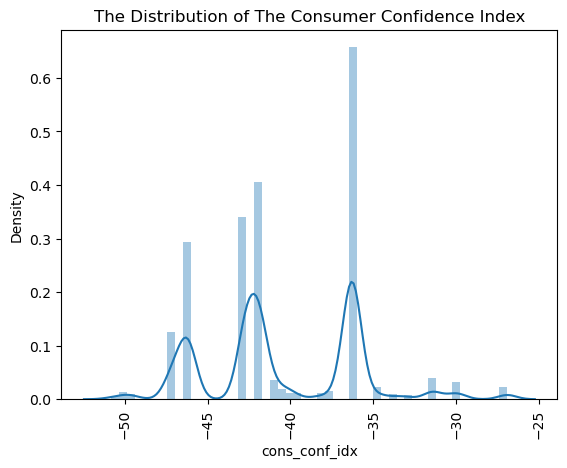

In [33]:
#Create distribution plot for employee variation rate
sns.distplot(df1['cons_conf_idx'])
plt.title('The Distribution of The Consumer Confidence Index')
plt.xticks(rotation=90)          
plt.show()

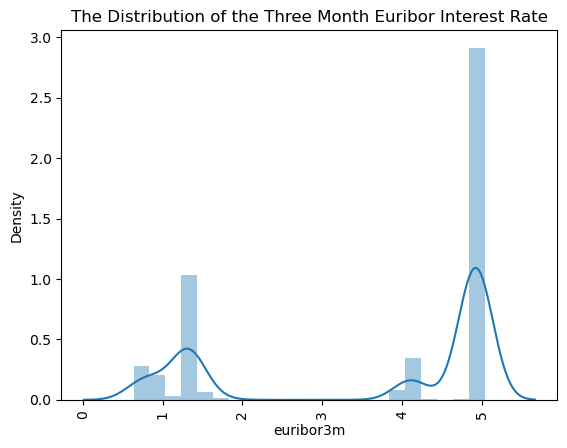

In [36]:
#Create distribution plot for three month Euribor interest rate.
sns.distplot(df1['euribor3m'])
plt.title('The Distribution of the Three Month Euribor Interest Rate')
plt.xticks(rotation=90)          
plt.show()

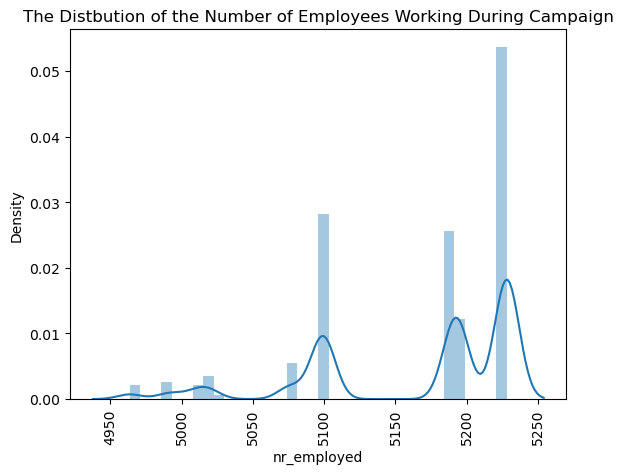

In [38]:
#Create distribution plot for employee variation rate
sns.distplot(df1['nr_employed'])
plt.title('The Distbution of the Number of Employees Working During Campaign')
plt.xticks(rotation=90)          
plt.show()

Text(0.5, 1.0, 'The Consumers Marital Status Vs. Consumer Price Index')

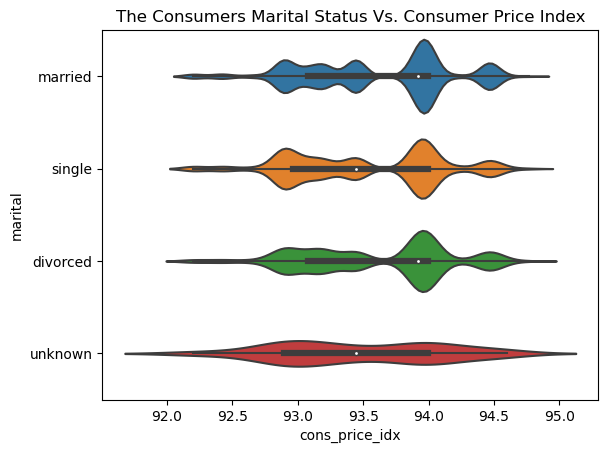

In [45]:
#Display a violin plot of the consumer's marital status and consumer price index.
sns.violinplot(y=df1['marital'], x=df1['cons_price_idx'])
plt.title('The Consumers Marital Status Vs. Consumer Price Index')

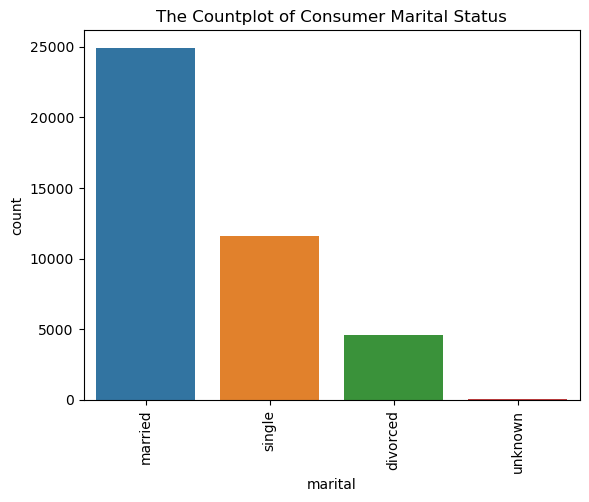

In [47]:
#Display the countplot of marital status.
sns.countplot(df1['marital'])
plt.title('The Countplot of Consumer Marital Status')
plt.xticks(rotation=90)          
plt.show()

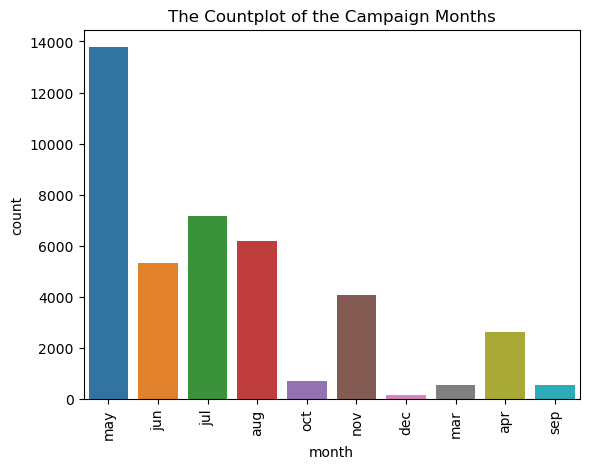

In [50]:
#Display the countplot of campaign months.
sns.countplot(df1['month'])
plt.title('The Countplot of the Campaign Months')
plt.xticks(rotation=90)          
plt.show()

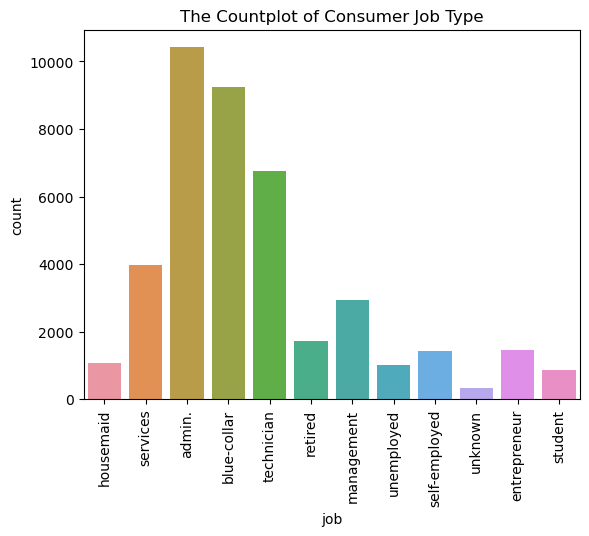

In [51]:
#Display the countplot of consumer job type.
sns.countplot(df1['job'])
plt.title('The Countplot of Consumer Job Type')
plt.xticks(rotation=90)          
plt.show()

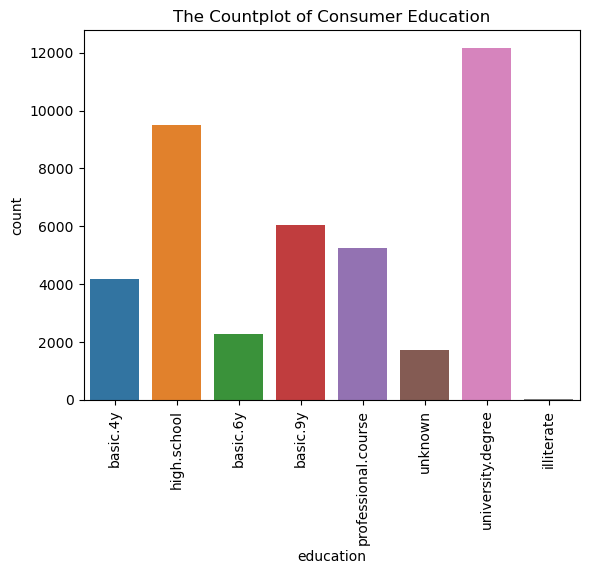

In [52]:
#Display the countplot of education.
sns.countplot(df1['education'])
plt.title('The Countplot of Consumer Education')
plt.xticks(rotation=90)          
plt.show()

In [69]:
#Use the label encoder to convert the column labels into numeric form.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['age'] = le.fit_transform(df1['age'])
df1['job'] = le.fit_transform(df1['job'])
df1['marital'] = le.fit_transform(df1['marital'])
df1['education'] = le.fit_transform(df1['education'])
df1['default'] = le.fit_transform(df1['default'])
df1['housing'] = le.fit_transform(df1['housing'])
df1['loan'] = le.fit_transform(df1['loan'])
df1['contact'] = le.fit_transform(df1['contact'])
df1['month'] = le.fit_transform(df1['month'])
df1['day_of_week'] = le.fit_transform(df1['day_of_week'])
df1['duration'] = le.fit_transform(df1['duration'])
df1['campaign'] = le.fit_transform(df1['campaign'])
df1['pdays'] = le.fit_transform(df1['pdays'])
df1['previous'] = le.fit_transform(df1['previous'])
df1['poutcome'] = le.fit_transform(df1['poutcome'])
df1['emp_var_rate'] = le.fit_transform(df1['emp_var_rate'])
df1['cons_price_idx'] = le.fit_transform(df1['cons_price_idx'])
df1['cons_conf_idx'] = le.fit_transform(df1['cons_conf_idx'])
df1['euribor3m'] = le.fit_transform(df1['euribor3m'])
df1['nr_employed'] = le.fit_transform(df1['nr_employed'])
df1['y'] = le.fit_transform(df1['y'])

df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0


<AxesSubplot:>

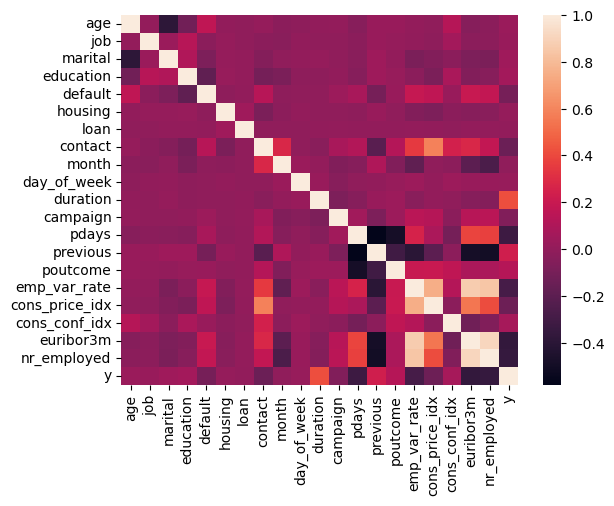

In [70]:
sns.heatmap(df1.corr())

In [73]:
#Import the cateegory encoders as ce.
import category_encoders as ce
encoder = ce.BinaryEncoder()
catdf = encoder.fit_transform(bankdf.loc[:,['job','marital', 'education',
                                              'default', 'housing', 'loan',
                                              'contact','month','poutcome']])
catdf.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,3,1,0,0,0,0,1,6,1
1,7,1,3,1,0,0,1,6,1
2,7,1,3,0,2,0,1,6,1
3,0,1,1,0,0,0,1,6,1
4,7,1,3,0,0,2,1,6,1


In [75]:
#The Decision Tree Classifier Model

In [76]:
#Import the Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [81]:
#Define x and y.
x = df1.drop(['y'],axis=1)
y = df1.y

In [82]:
#Train, test, split dataset.
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.20,random_state=5)

In [83]:
#Display the score of the decisiontreeclassifier model.
clf = DecisionTreeClassifier(random_state=0)
clf.fit(xtrain,ytrain, sample_weight=None, check_input=True, X_idx_sorted=None)
clf.get_params(deep=True)
clf.predict(xtest, check_input=True)
clf.predict_log_proba(xtest)
clf.predict(xtest,check_input=True)
print(clf.score(xtest,ytest, sample_weight=None))

0.8885651857246905


C:\Users\avami\anaconda3\lib\site-packages\sklearn\tree\_classes.py:1014: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) 
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [87]:
#Import the sklearn metrics libraries.
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [88]:
#Conduct the prediction tests and print the metrics.
y_pred = gb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))

[[6526  807]
 [ 376  529]]
85.63971837824714
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7333
           1       0.40      0.58      0.47       905

    accuracy                           0.86      8238
   macro avg       0.67      0.74      0.69      8238
weighted avg       0.89      0.86      0.87      8238

